In [8]:
import emcee
import corner
import numpy as np
import matplotlib.pyplot as plt
import os.path
hvlist = np.loadtxt('hvlist.txt')
f = open(f'namelist.txt', "r", encoding="utf-8")
str1 = f.read()
namelist = str1.split()
mcmcdir = 'mcmc3'

## define Fflux & load x,y

In [9]:
#import NEATM
from NEATM2 import *
#constant
Fsun = 1367.5           # sun constant
sigma = 5.67E-8         #stefan-boltzmann constant
h = 6.626007015E-34     #plank constant
#q = 0.29+0.684*0.15    #phase integral = 0.29+0.684*G(=0.15)
epsi = 0.9             #radiance epsilon
kB = 1.38064852E-23     #boltzmann constant  j/k
cl = 299792458.0        #lightspeed m/s
au = 149597870700.0
pi = 3.1415926535
Rsun = 0.00465*au   #Rsun *m
Tsun = 5778         #Tsun  K
G = 0.15
Ndd = 15
lamdai = [3.4,4.6,12,22]
#....define f
def loss(obs,cal,err):
    l = len(obs)
    return sum(((obs-cal)/err)**2)/l
def Model_neatm_Ref_jhx(theta,x,lamda,nn4):
    '''
    theta = (eta,D,wf)
    x = (astp,obsp)
    x = (3.4x;4.6x;12x;22x)
    '''
    eta,D,wf = theta
    astp,obsp = x
    lamda1,lamda2,lamda3,lamda4 = lamda
    #print('k',astp)
    pv = (1329*pow(10,-Hv/5)/(D*0.001))**2
    q = 0.29+0.684*G
    A = q*pv
    flux = np.zeros(nn4*4)
    for i in range(nn4):
        fluxi,frLambi,frLommi = get_flux_ref(astp[i],obsp[i],D,lamda1,eta,A,Hv)
        flux[i] = 1.3917*fluxi + 1.0049*(wf*frLambi + frLommi)
        #print(f'{i}:ast{astp[i]} obs{obsp[i]} flux {flux[i]}')
    for i in range(nn4,2*nn4):
        fluxi,frLambi,frLommi = get_flux_ref(astp[i],obsp[i],D,lamda2,eta,A,Hv)
        flux[i] = 1.1124*fluxi + 1.0193*(wf*frLambi + frLommi)
        #print(f'{i}:ast{astp[i]} obs{obsp[i]} flux {flux[i]}')
    for i in range(2*nn4,nn4*3):
        fluxi,frLambi,frLommi = get_flux_ref(astp[i],obsp[i],D,lamda3,eta,A,Hv)
        flux[i] = 0.8791*fluxi 
        #print(f'{i}:ast{astp[i]} obs{obsp[i]} flux {flux[i]}')
    for i in range(nn4*3,nn4*4):
        fluxi,frLambi,frLommi = get_flux_ref(astp[i],obsp[i],D,lamda4,eta,A,Hv)
        flux[i] = 0.9865*fluxi     
       # print(f'{i}:ast{astp[i]} obs{obsp[i]} flux {flux[i]}')
    return flux  

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 4.053271584224779 D =178.3978190342308 pv = 0.1528519137174516 wf =1.819216996540093e-05
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  43.04711976358944


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 4.178884769472468 D =164.93560576472947 pv = 0.03736122626797864 wf =0.11406367611902235
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  20.42740678297131


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 2.894517897851526 D =170.17971269788166 pv = 0.04500226675167669 wf =0.007037200079694293
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  138.98785974618255


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 2.8120485358666567 D =123.40051295051111 pv = 0.09298567155211121 wf =0.026927086967604694
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  60.11309294372457


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 0.03281436029776526 D =66.06589177877223 pv = 4.084090514477035e-32 wf =0.24650264579456677
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  50.988159699955034


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 1.6704481935910303 D =264.6498117538415 pv = 0.03324350316854716 wf =0.4999387170991
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  9082.404119285757


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 1.7770968169234669 D =164.55411649963537 pv = 0.06522775926049865 wf =0.04939090029148525
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  7.231820755139988


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 1.375642824685579 D =196.615637982877 pv = 0.05009724556242547 wf =0.49984102113375656


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


(4520, 3)
LossFunction =  24.649045808914618


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 2.154170692839566 D =274.32080641551204 pv = 0.04078800503993725 wf =0.011668941935766414
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  12.54239952489253


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 9.99864608784457 D =234.64219480970988 pv = 0.08835634397304519 wf =6.910494363525943e-07
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  552.3196347966875


/tmp/ipykernel_58872/2556091795.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 1.1101194451728797 D =313.18928277778076 pv = 0.049594803902107076 wf =0.49668071224170274
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  9.249402264871906


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 9.999342190880657 D =70.35410932756592 pv = 0.08174684934959367 wf =6.935612859084379e-07
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  1161.8887236682006


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 5.24654190994983 D =271.4323037790571 pv = 0.04568008426039241 wf =3.593309751694482e-05
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  55.54745862462072


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 4.190021324779112 D =204.30210773868538 pv = 0.09694027949639636 wf =6.109292070049165e-06
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  51.883814398666765


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 4.452216266127188 D =157.69332336502055 pv = 0.07102698011107489 wf =5.854274324763374e-06
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  24.884468446957392


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 2.630553933972407 D =209.5715729397141 pv = 0.10101484827921633 wf =0.00036368289973610023
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  432366.7924820056


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 1.8844569306146577 D =319.9120258516157 pv = 0.04753230003958525 wf =0.49983179671753925
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  47.121842944677496


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 4.2376328601560225 D =75.90201321945571 pv = 0.11131235508219277 wf =9.157824942778998e-06
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  20.46619758589697


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 1.3360624039971625 D =112.92567097101934 pv = 0.13850472920098594 wf =0.4998608962355477
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  11530.77646236853


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 9.998877131400675 D =212.14785208221184 pv = 0.10808680607089743 wf =6.442663567369864e-07
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  156268.78107748833


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 0.5320486781556631 D =799.9773586998685 pv = 2.78544489231122e-34 wf =0.2616122441938741
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  28.8802422901111


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 9.700229064707798 D =138.29735169662854 pv = 0.04031087585699971 wf =1.649655558448111e-05
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  103.75465626244217


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 4.560997135805271 D =130.9139329806074 pv = 0.13585581157613064 wf =4.582575773579739e-06
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  50.770272902975144


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 7.962809776608419 D =151.13838656842626 pv = 0.11073894926259445 wf =7.671276865433994e-06
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  85.55035407523619


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 2.1545124519377428 D =220.5824440308948 pv = 0.030193125569283625 wf =0.4999197017593228
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  995846.7996281339


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 2.174553367422621 D =181.78509566485727 pv = 0.05344824084369564 wf =0.4997214894516677
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  34.73226148565983


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 2.600111764635484 D =170.62512591306344 pv = 0.041972418272784015 wf =0.49991965586009657
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  25.769878977533306


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 2.4418475077059103 D =201.62860991213117 pv = 0.03962284448871444 wf =0.49984862875029057
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  157.42647007344362


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 0.028675396655186383 D =71.42102116075655 pv = 3.494603046686968e-32 wf =0.258415952243185
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  47.58880604098155


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 4.1815898154920585 D =209.89544960743672 pv = 0.11351255913766926 wf =2.1566745535678463e-05
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  18.01903777406048


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 9.994759755484747 D =207.99866773910372 pv = 0.11244207601517264 wf =1.4012969845123716e-06
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  822.6440745394332


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 8.600275807992173 D =211.98711270583232 pv = 0.04725318019855403 wf =2.0138127579813185e-05
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  24.279516972401073


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 5.388722301886899 D =194.88274640952756 pv = 0.0971635064275945 wf =4.518856642383517e-06
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  33.497147623616314


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 0.1672082813000182 D =162.00367611428854 pv = 0.1853532574937586 wf =0.2801167698247182
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  5206.58306459019


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 1.9019011182713141 D =349.87584911630233 pv = 0.03624282407424338 wf =0.4999270845666408
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  89.32966759381333


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 7.6109025670936 D =311.53896732397266 pv = 0.023989721704194635 wf =0.0003380981173923293
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  19.916248478713175


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

eta = 9.969573094186533 D =185.25134336903454 pv = 0.04280822591419723 wf =2.3704711128171162e-05
(4520, 3)


/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/testssh_ans/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  44.618243693604185


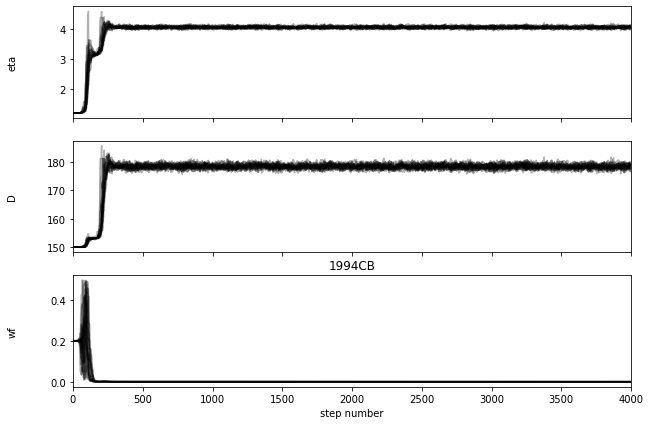

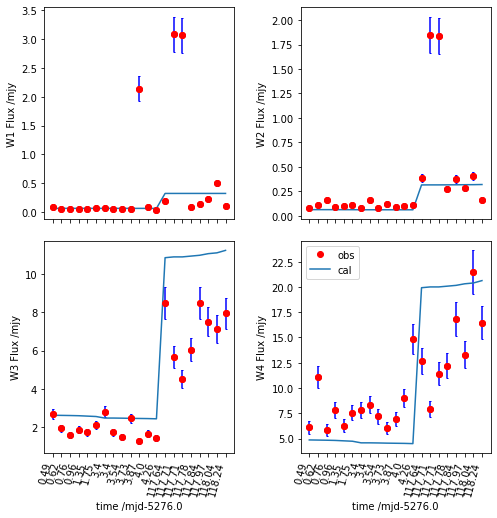

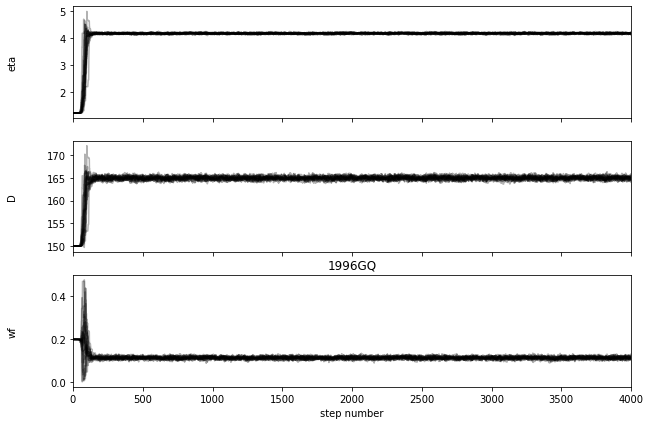

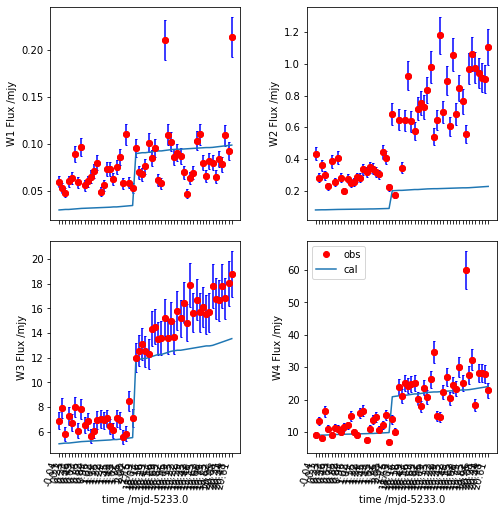

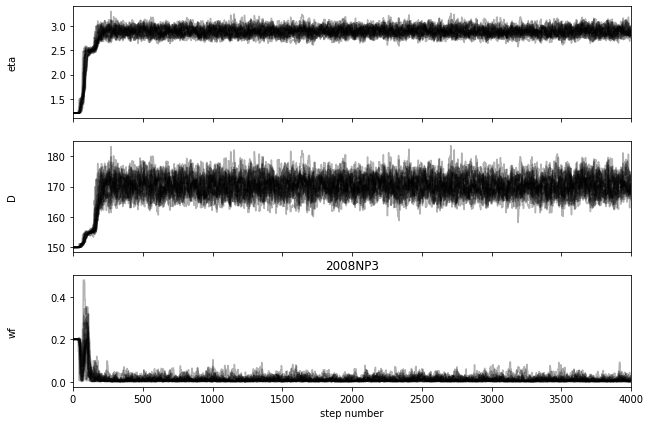

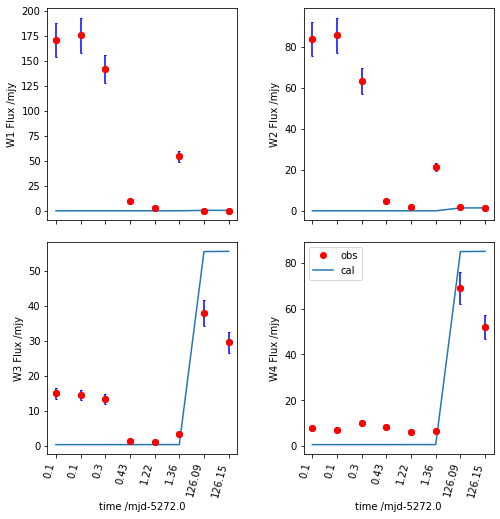

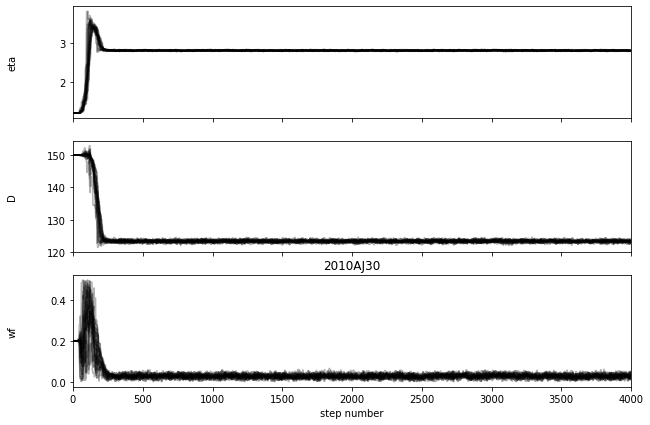

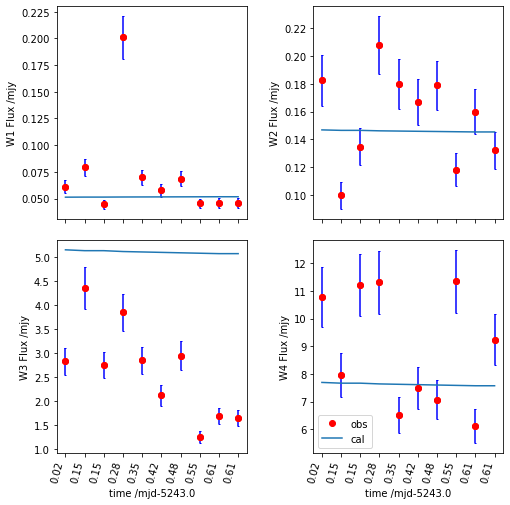

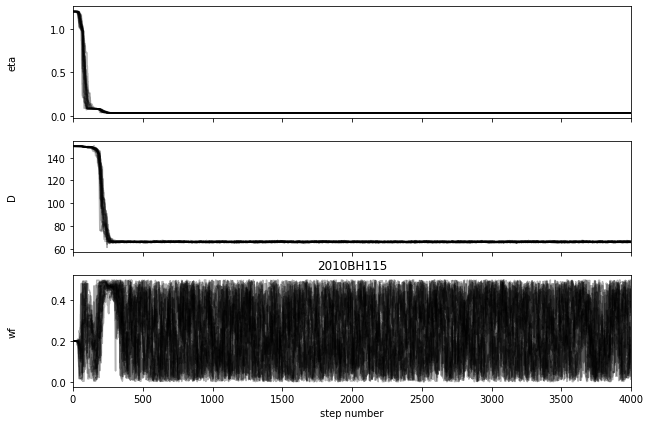

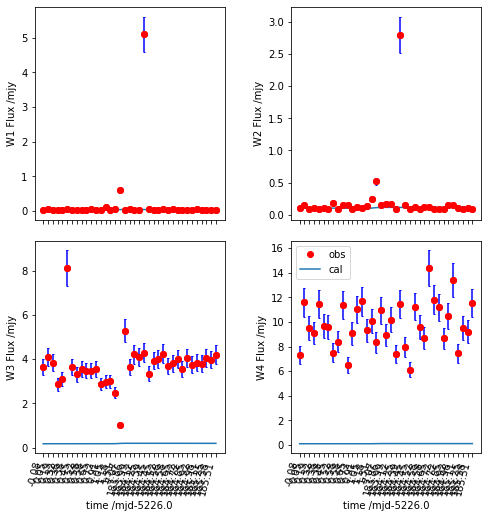

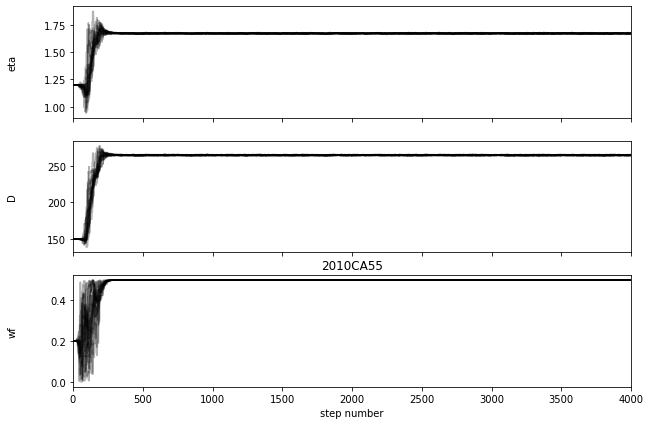

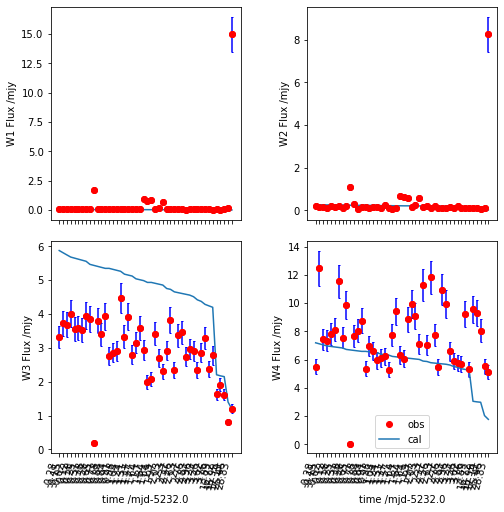

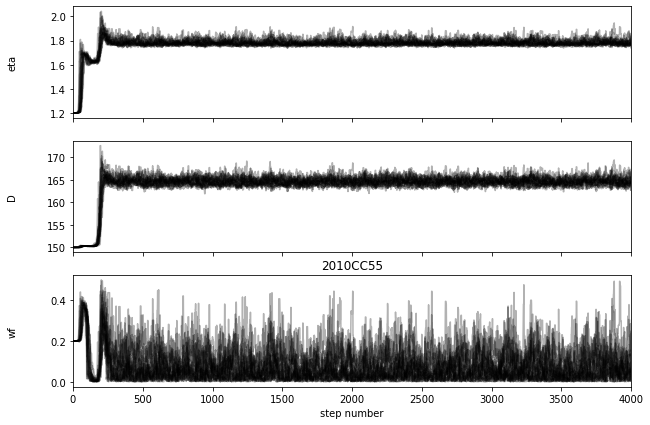

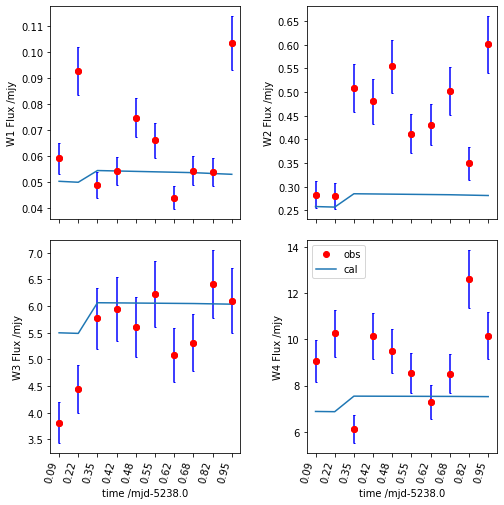

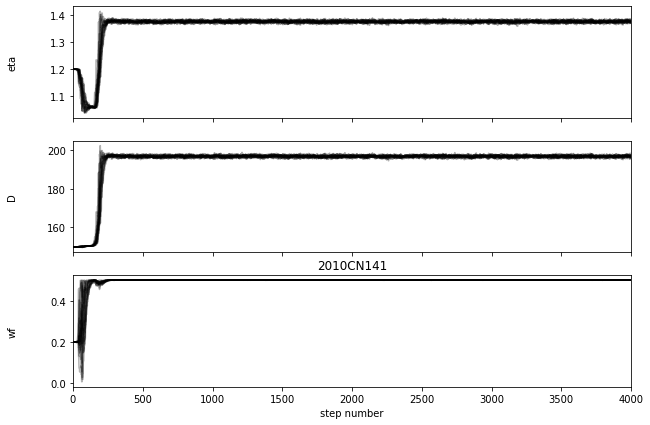

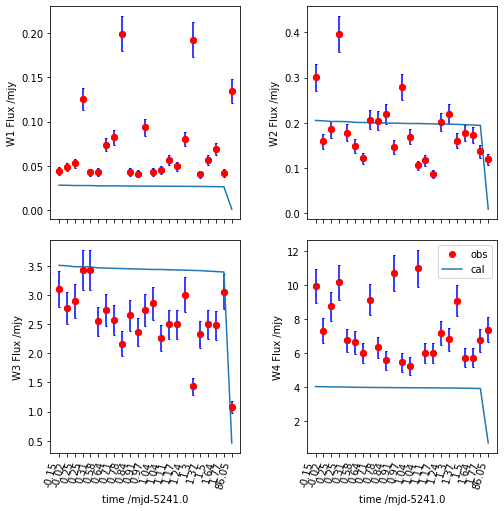

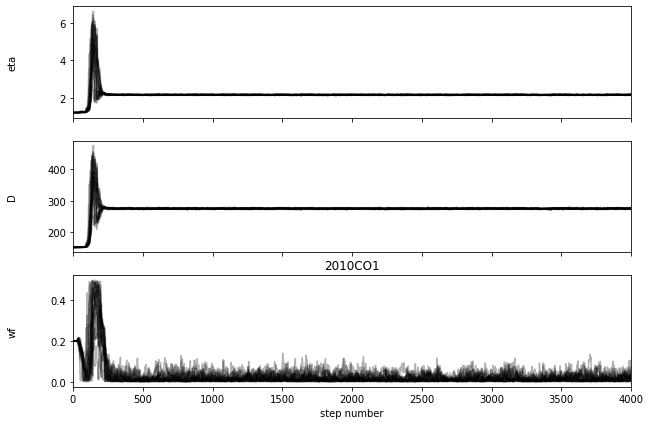

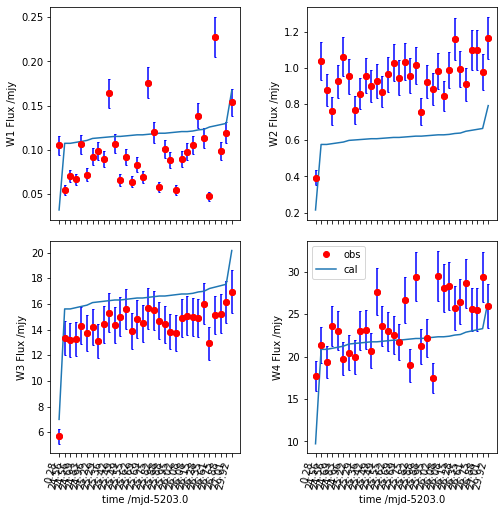

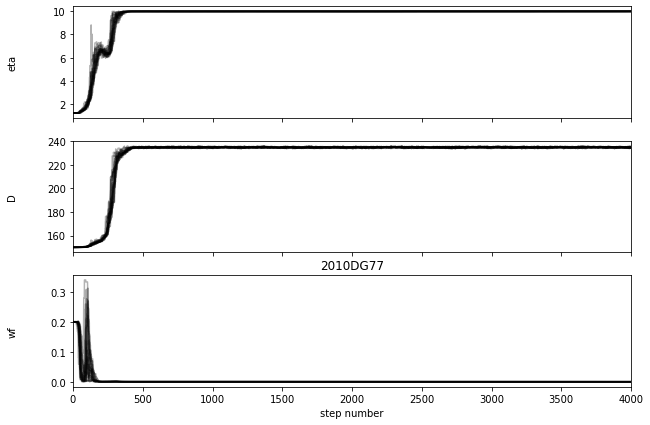

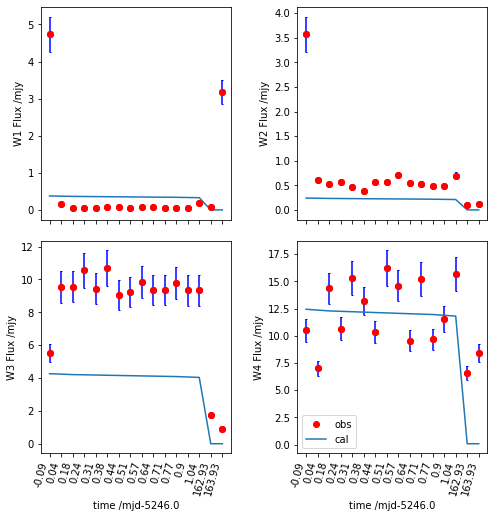

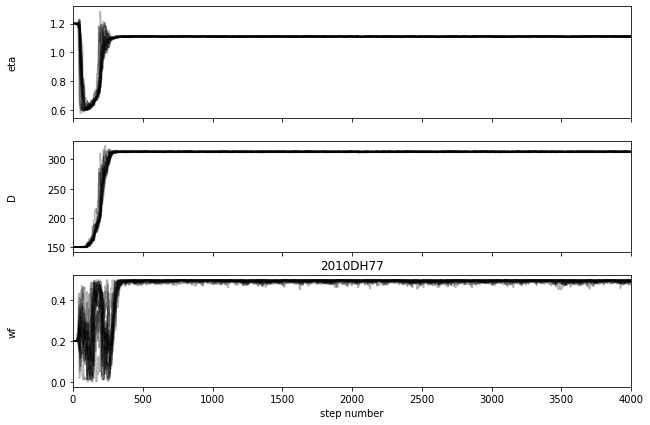

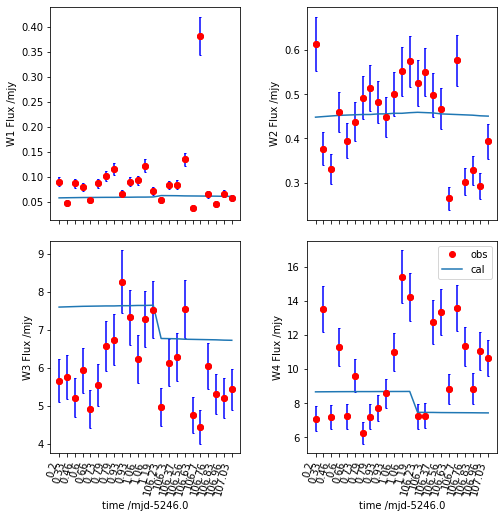

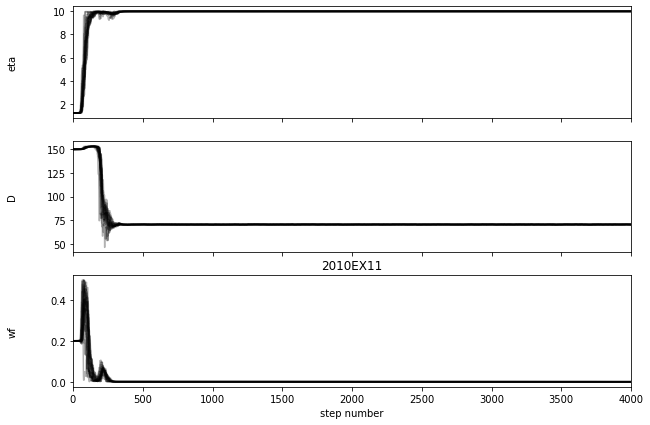

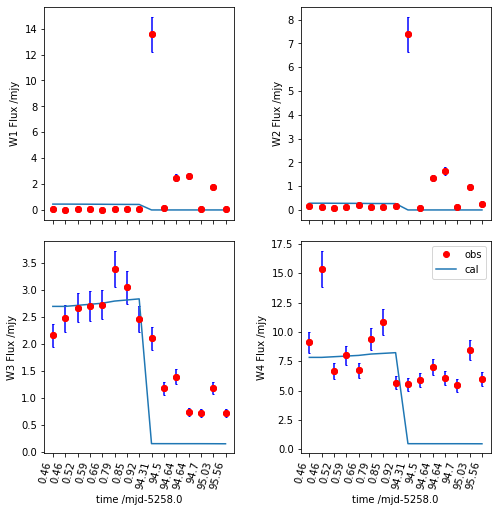

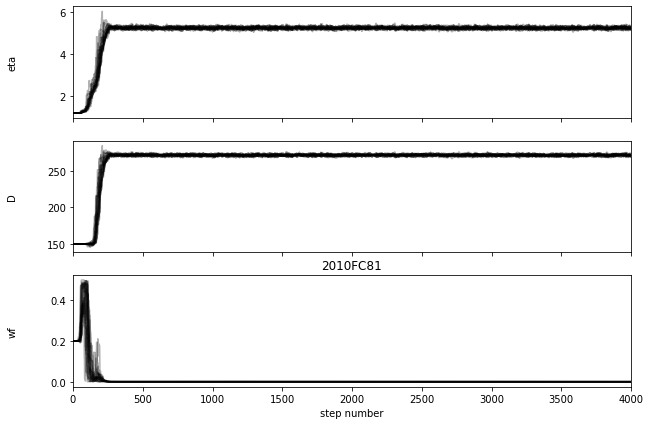

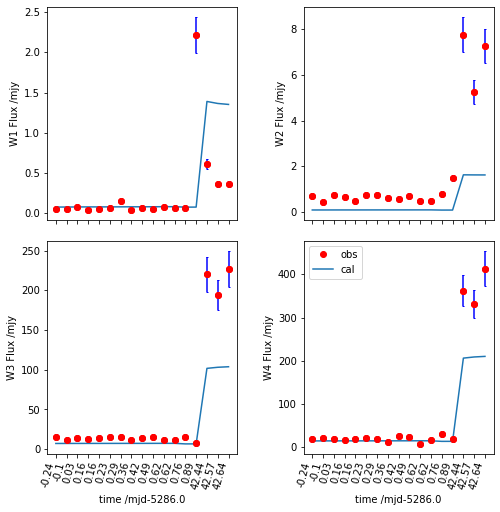

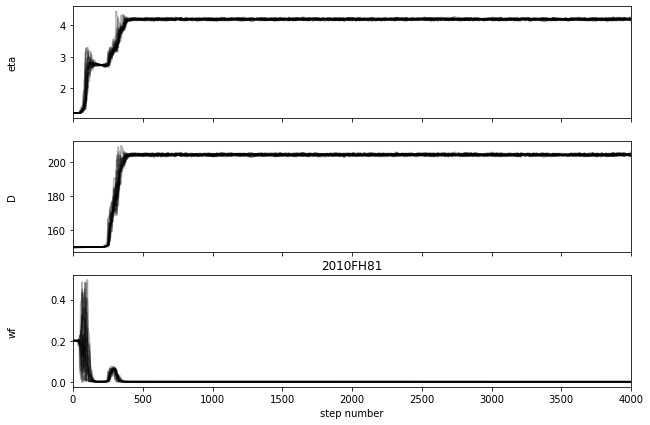

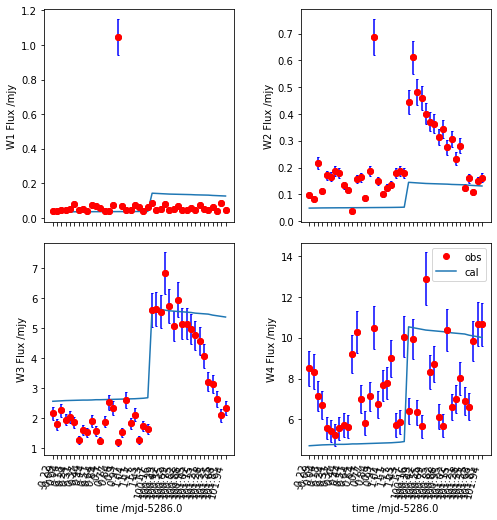

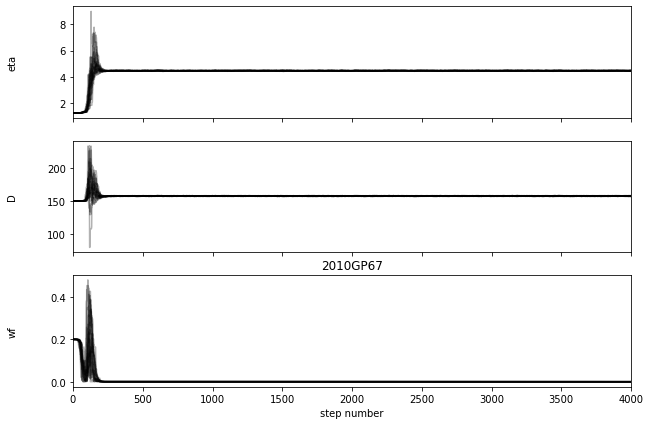

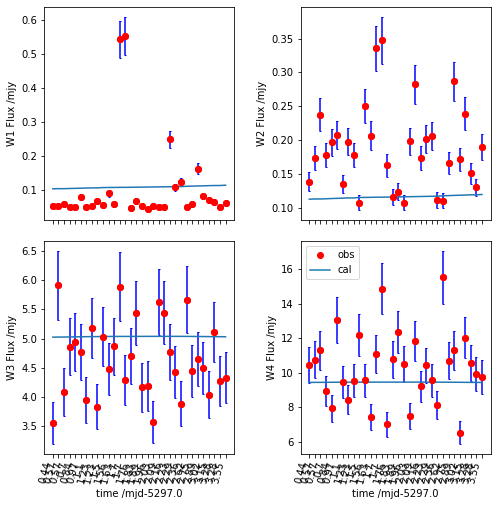

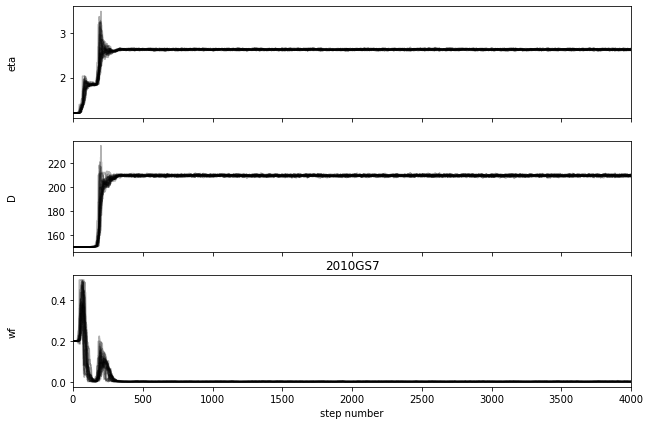

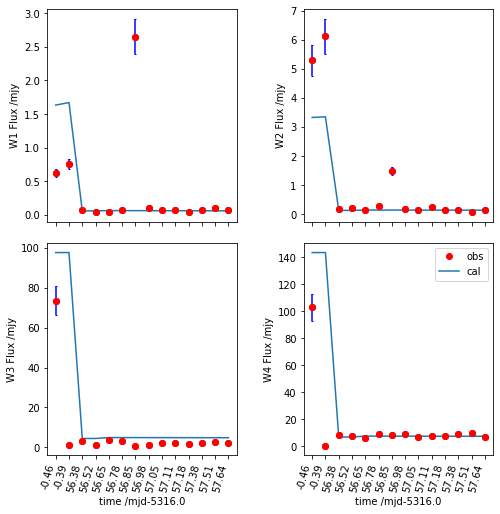

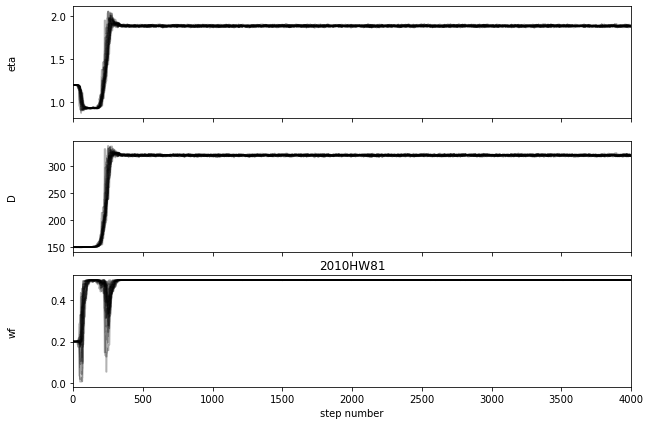

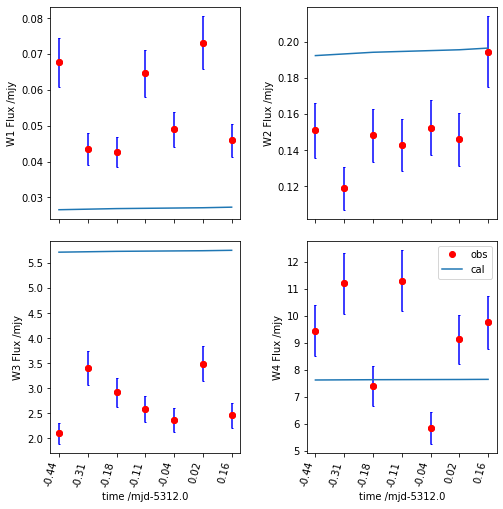

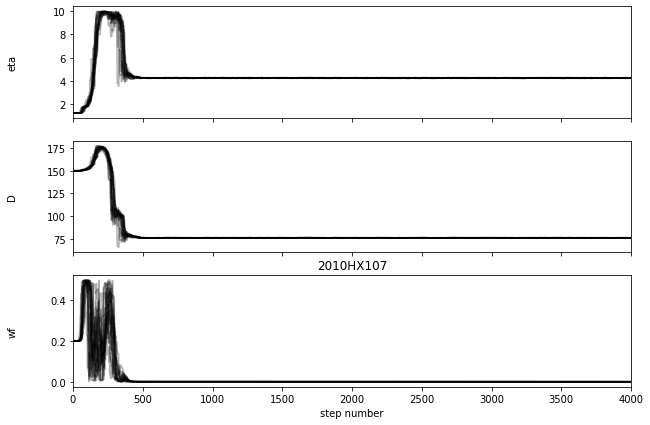

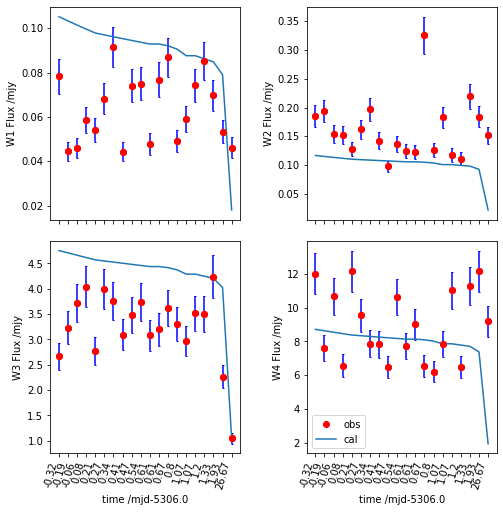

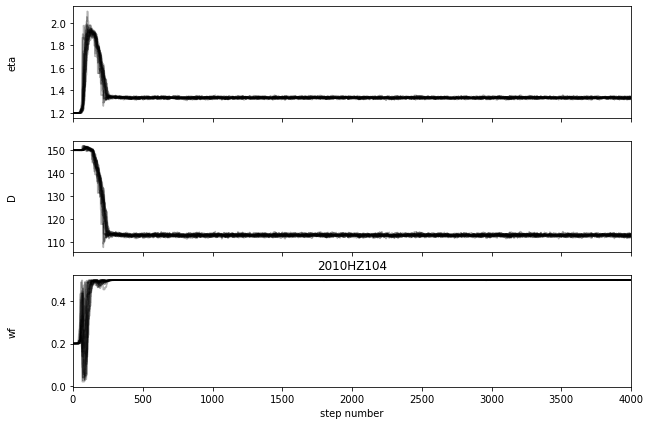

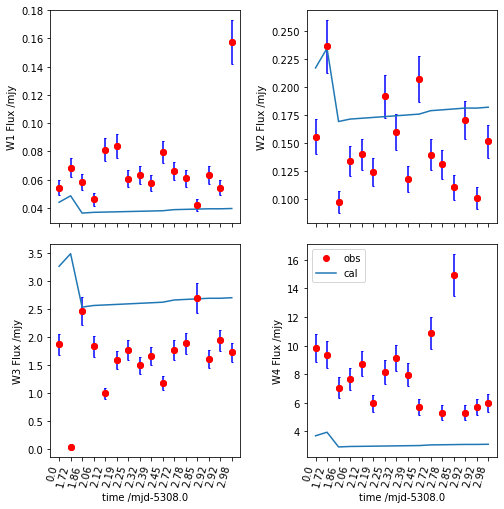

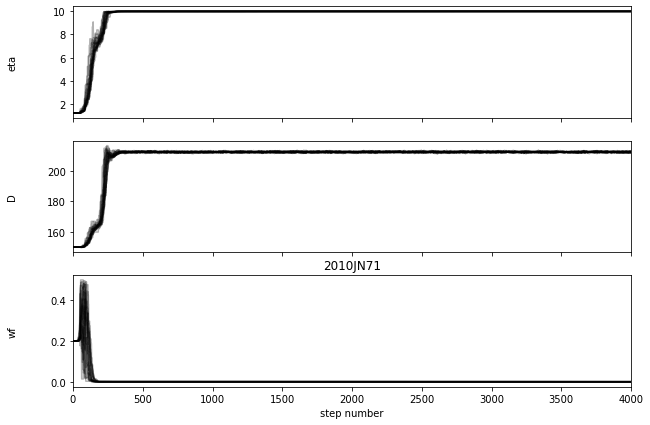

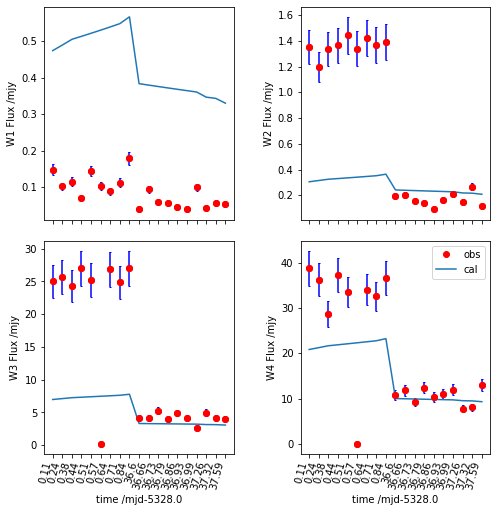

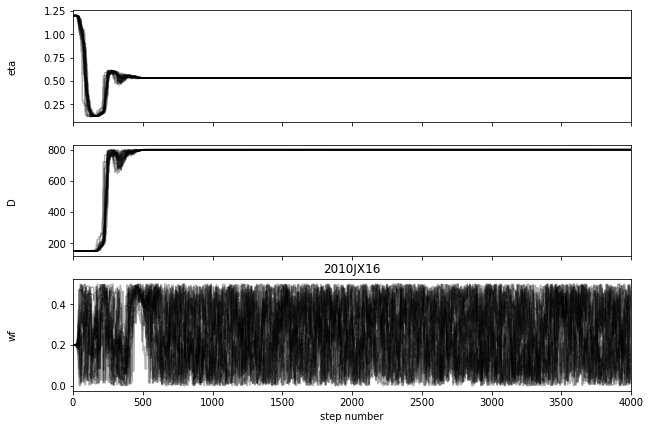

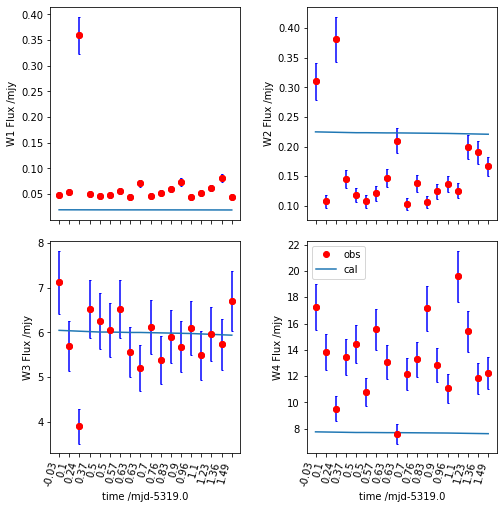

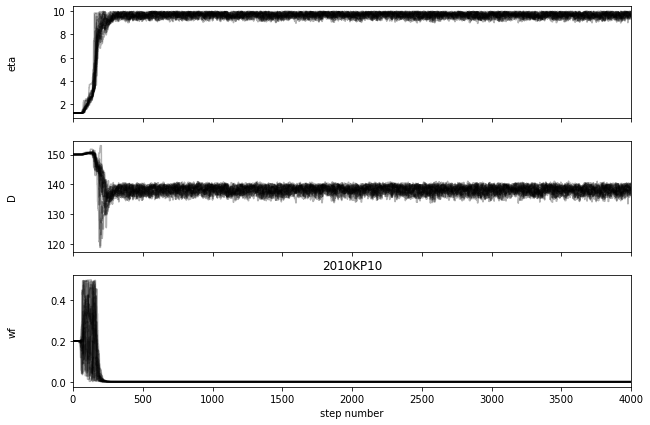

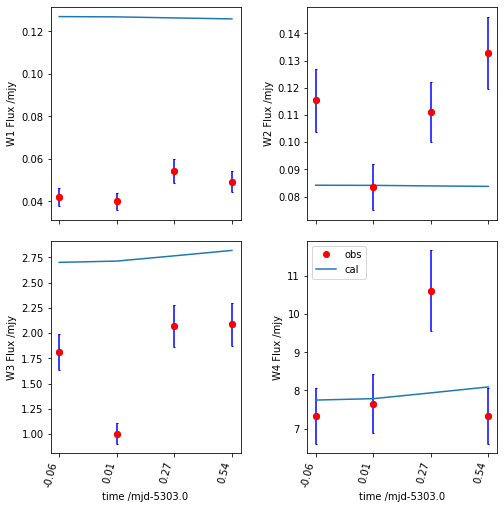

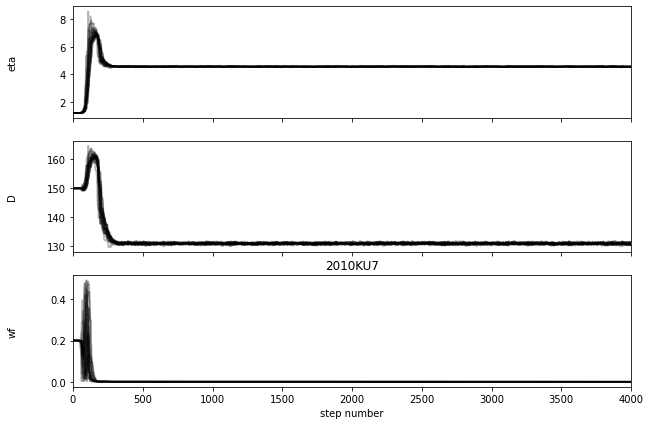

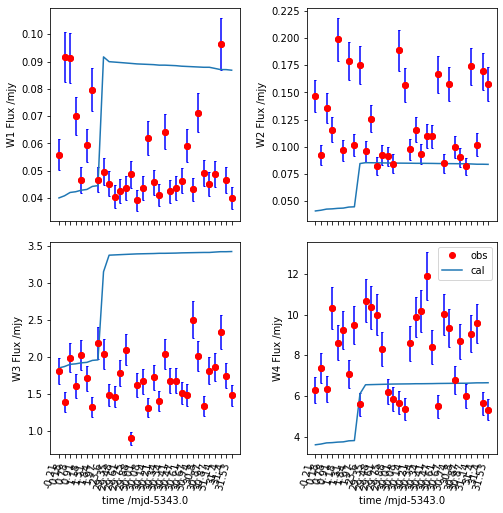

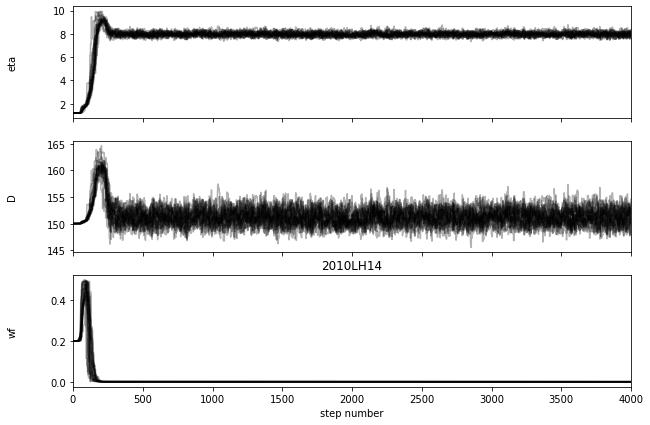

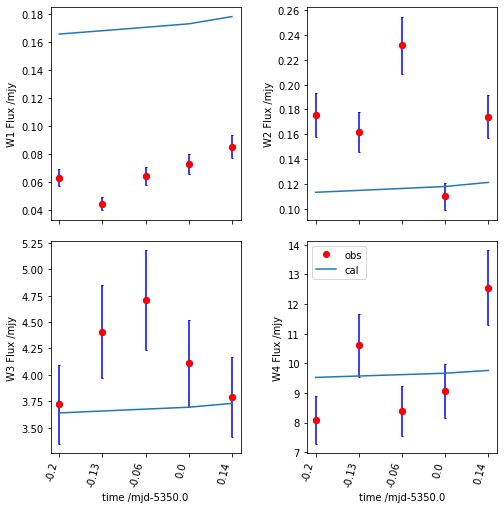

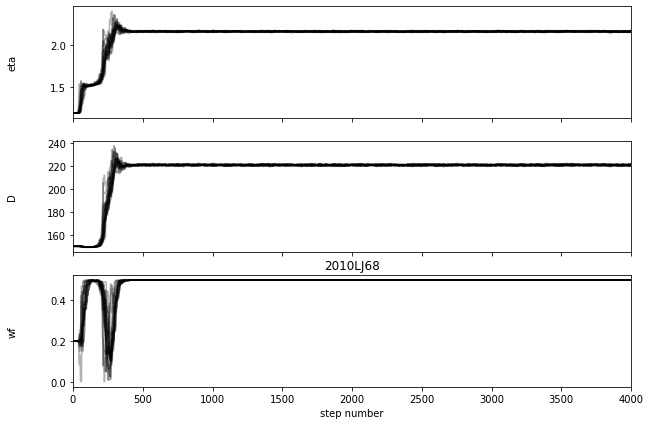

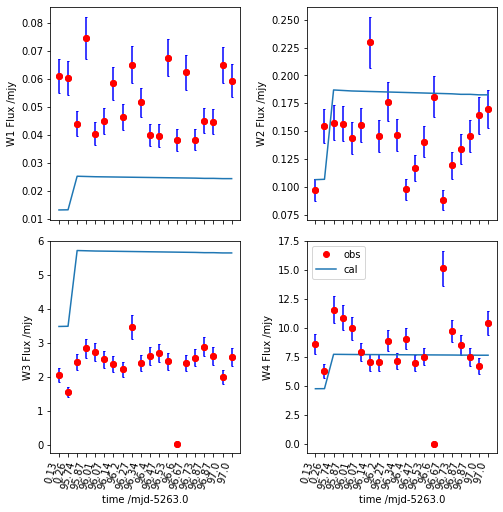

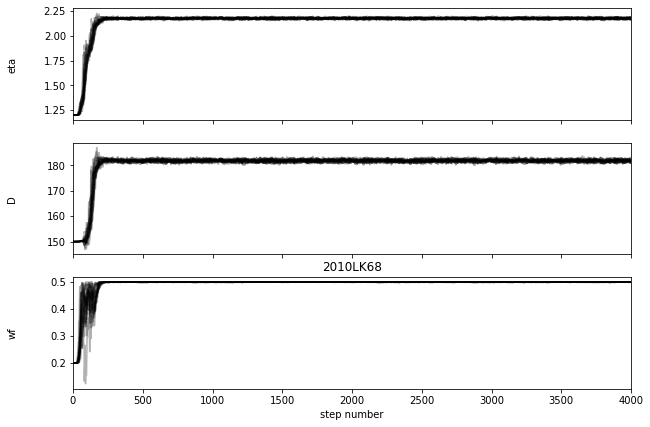

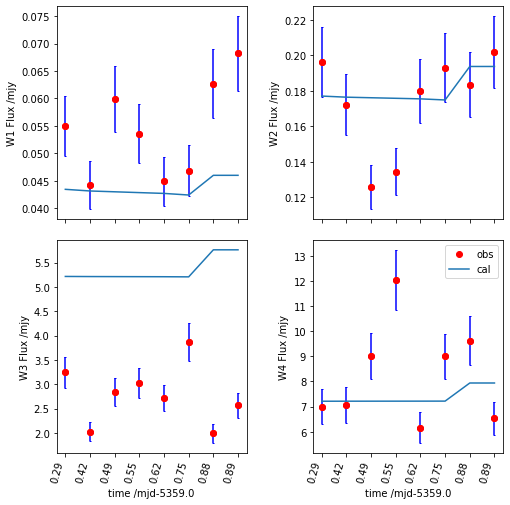

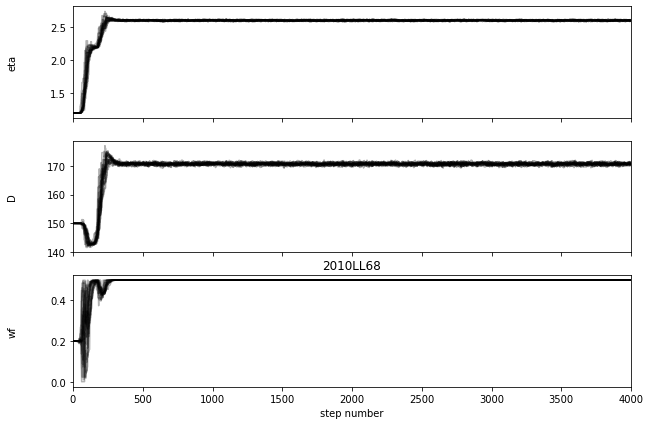

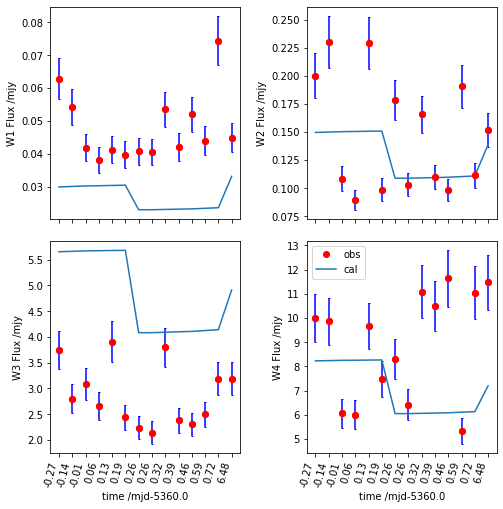

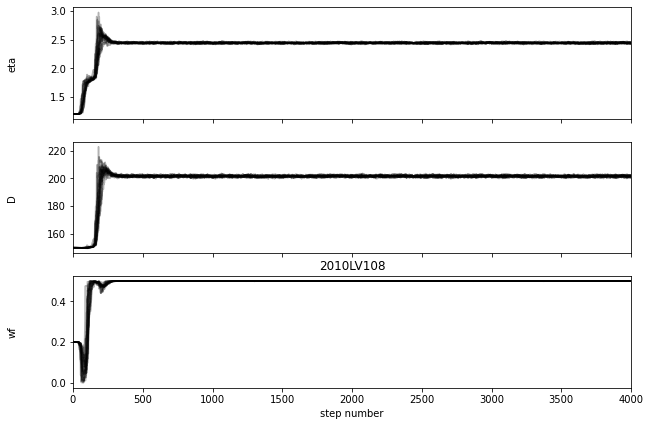

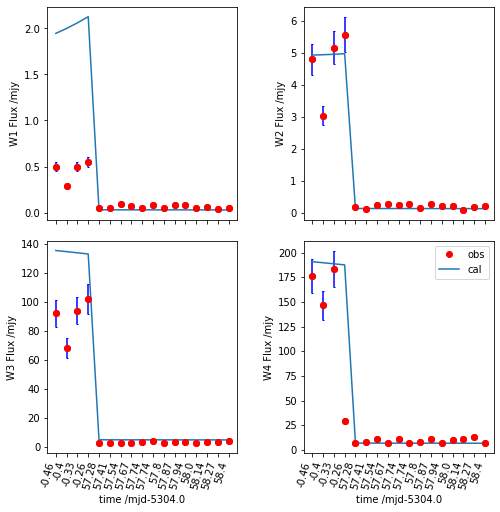

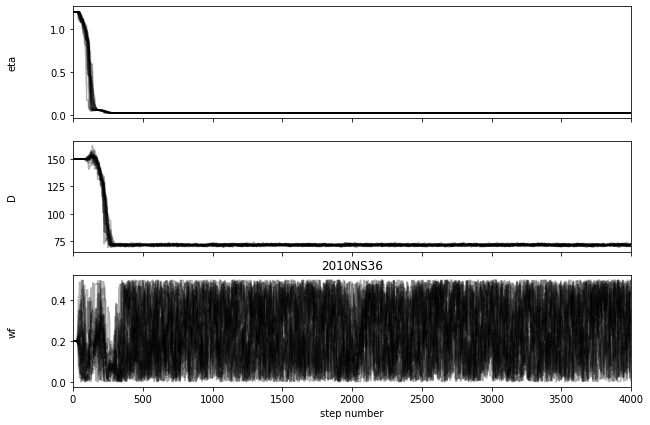

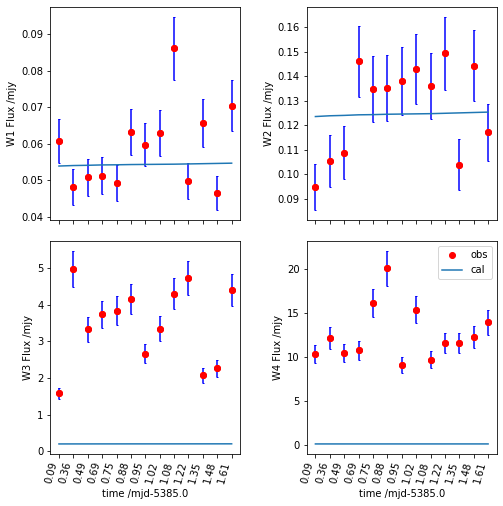

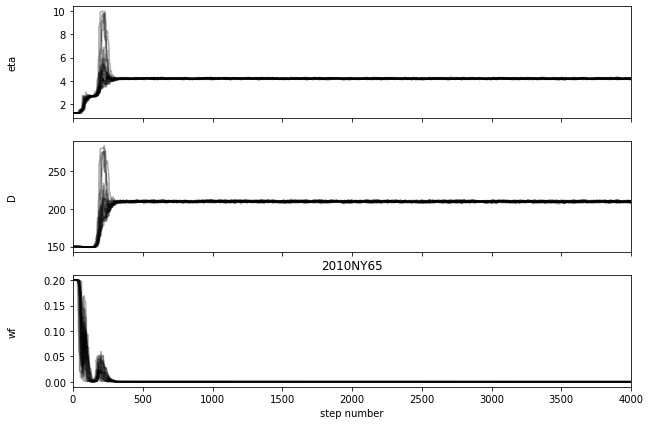

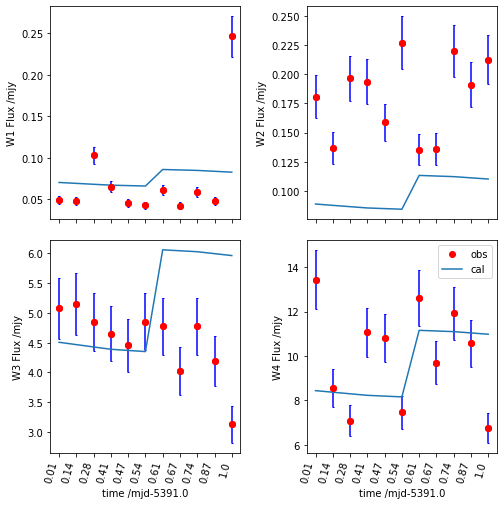

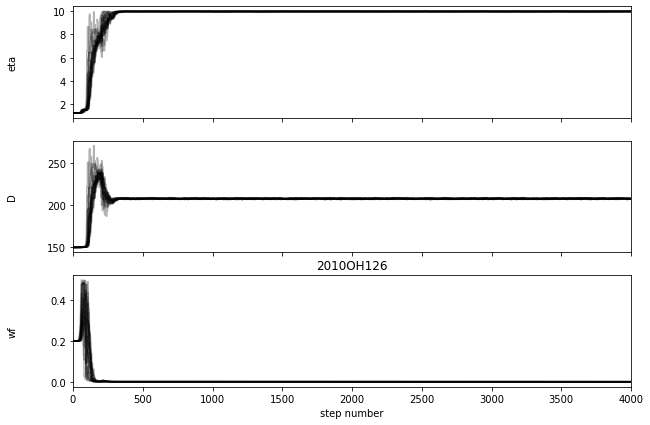

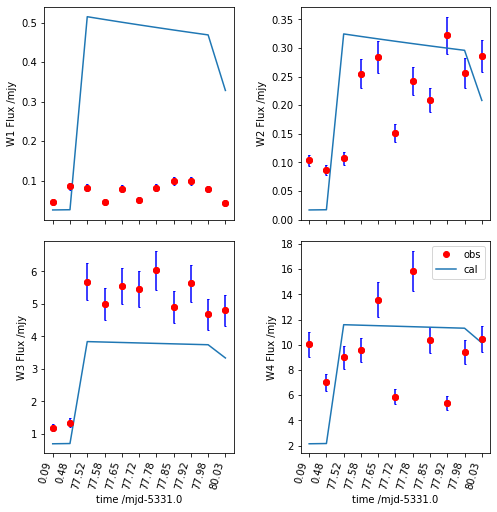

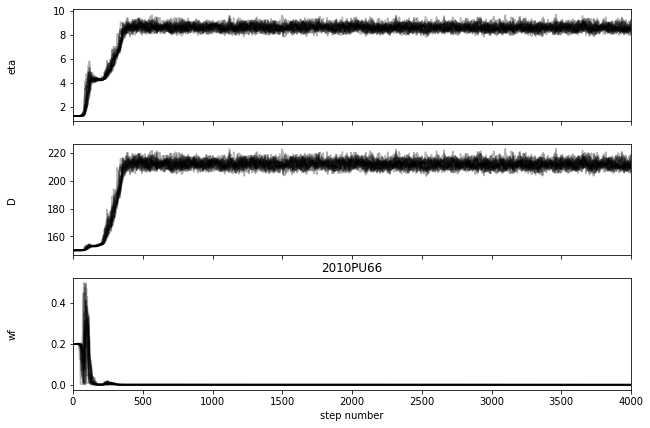

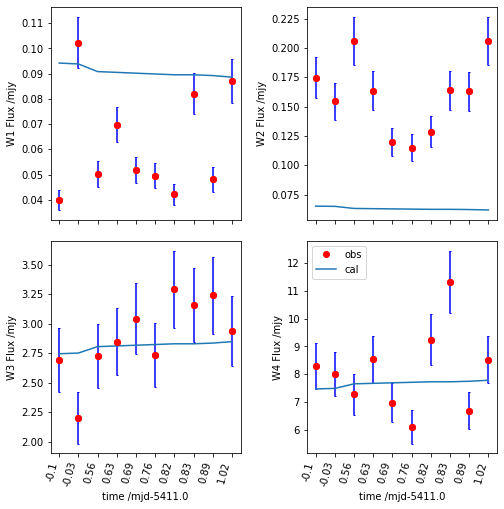

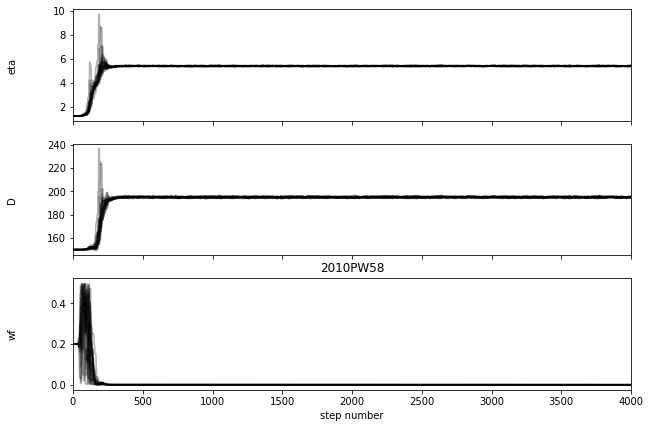

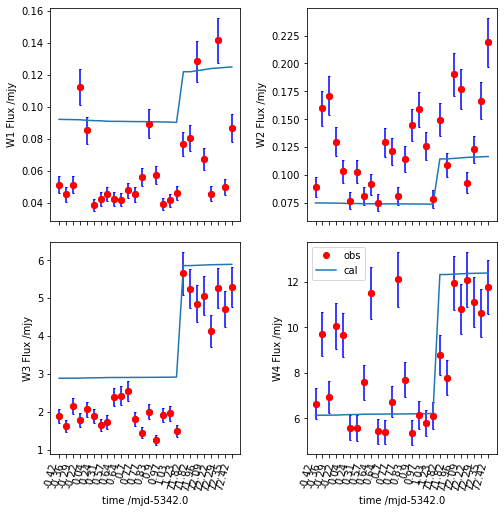

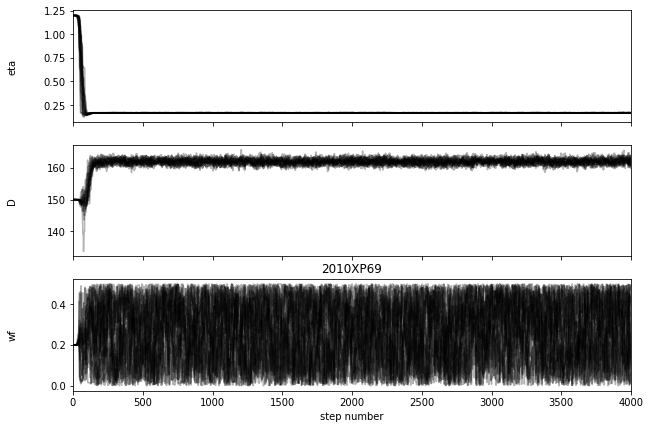

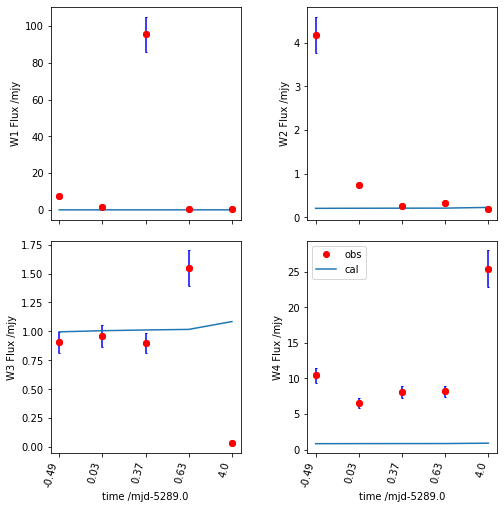

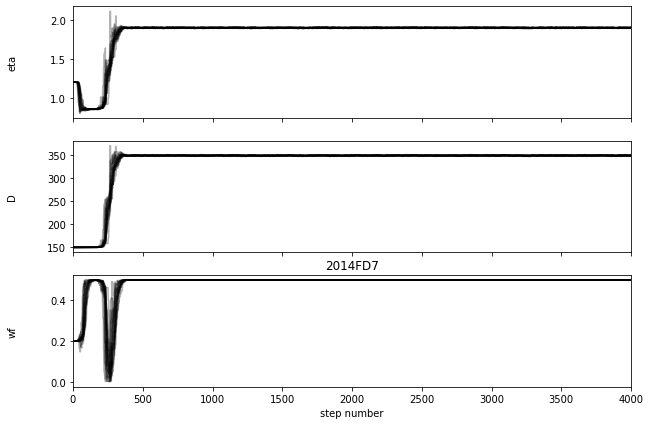

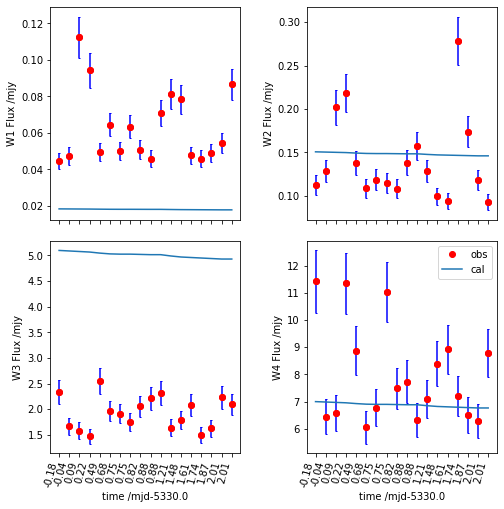

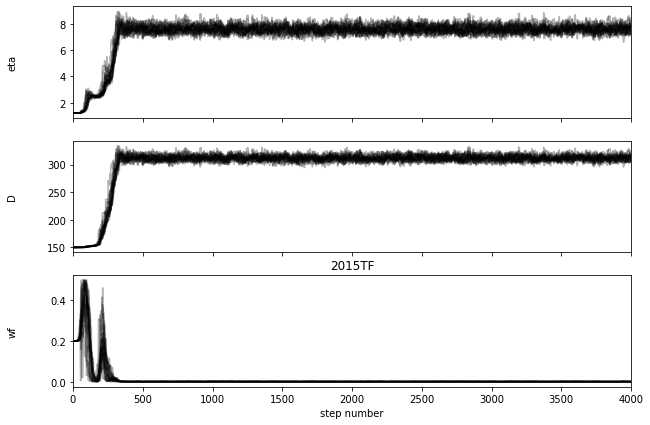

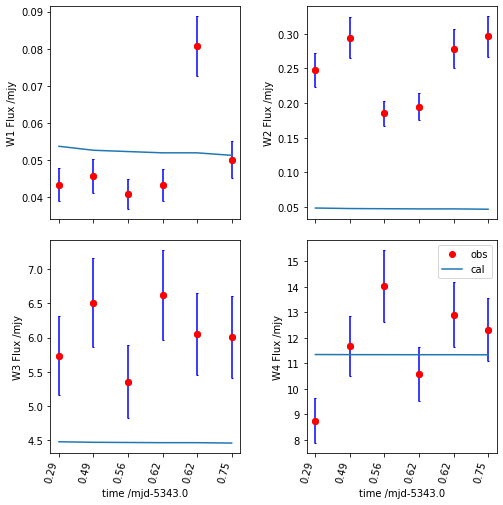

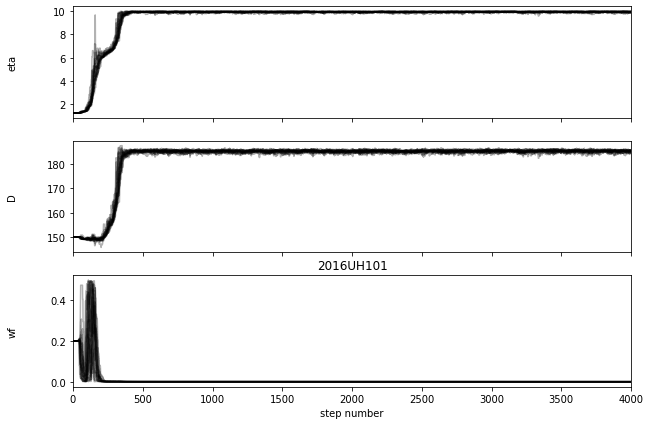

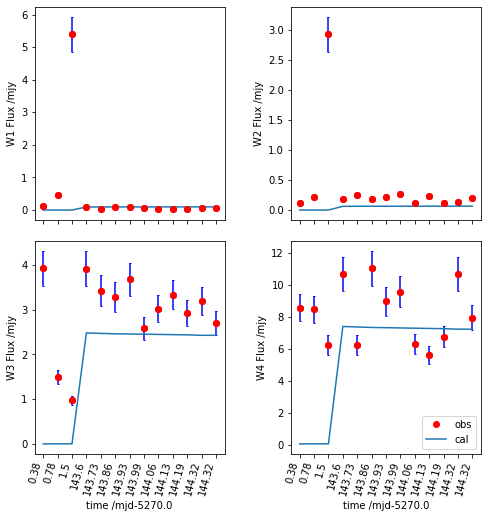

In [10]:
for i in range(len(namelist)):
    name = namelist[i]
    Hv = hvlist[i]
    if not os.path.exists(f'./{mcmcdir}/ansfit/fit.txt.{name}'):
        continue
    #.........load xy
    #df = pd.read_table(f'ws.dat.{name}')
    ast = np.loadtxt(f'./{mcmcdir}/datepoch/ws.dat.{name}',skiprows=1,usecols=(5,6,7))
    ear = np.loadtxt(f'./{mcmcdir}/datepoch/ws.dat.{name}',skiprows=1,usecols=(8,9,10))
    #ast-sun
    d_N = np.sqrt(ast[:,0]**2+ast[:,1]**2+ast[:,2]**2)
    #print('ast-sun',d_N)
    #ast-earth
    delta_N = np.sqrt((ast[:,0]-ear[:,0])**2+(ast[:,1]-ear[:,1])**2+(ast[:,2]-ear[:,2])**2)
    #print('ast-earth',delta_N)
    #earth-sun
    dd_N = np.sqrt(ear[:,0]**2+ear[:,1]**2+ear[:,2]**2)
    #print('earth-sun',dd_N)
    #alpha
    alpha_N = (delta_N*delta_N+d_N*d_N-dd_N*dd_N)/(2*delta_N*d_N)
    alpha_N = np.arccos(alpha_N)
    x = (delta_N,d_N,alpha_N)

    time = np.loadtxt(f'./{mcmcdir}/datjd/mba.jd.{name}')
    mjdtime = time-2400000.5
    obsdat = np.loadtxt(f'./{mcmcdir}/datwise/obsNEW.txt.{name}')
    n4 = len(obsdat)//4
    w1 = obsdat[:n4]
    w2 = obsdat[n4:2*n4]
    w3 = obsdat[2*n4:n4*3]
    w4 = obsdat[n4*3:]
    y = obsdat  
    #..........
    xast = np.vstack((ast,ast,ast,ast))
    xear  =  np.vstack((ear,ear,ear,ear))
    xt = (xast,xear)
    samples0 = np.loadtxt(f'./{mcmcdir}/figmcmc/samples/samples_{0}.txt.{name}')
    samples1 = np.loadtxt(f'./{mcmcdir}/figmcmc/samples/samples_{1}.txt.{name}')
    samples2 = np.loadtxt(f'./{mcmcdir}/figmcmc/samples/samples_{2}.txt.{name}')
    samples = [samples0,samples1,samples2]
    fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
    labels = ["eta", "D", "wf"]
    ndim = len(labels)
    for i in range(ndim):
        ax = axes[i]
        ax.plot(samples[i], "k", alpha=0.3)
        ax.set_xlim(0, len(samples[i]))
        ax.set_ylabel(labels[i])
        ax.yaxis.set_label_coords(-0.1, 0.5)
        axes[-1].set_xlabel("step number");
    plt.title(name)
    plt.savefig(f'./{mcmcdir}/figflux/chain_{name}.png',transparent=True)
    datans = np.loadtxt(f'./{mcmcdir}/ansfit/fit.txt.{name}')
    eta_fit,D_fit,wf_fit = datans[4]
    pv = datans[3][1]
    from IPython.display import display, Math
    for i in range(ndim):
        ans = datans[i]
        txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
        txt = txt.format(ans[0], ans[1], ans[2], labels[i])
        display(Math(txt))
    #print(f'eta = {eta_fit} D ={D_fit} pv = {pv} wf ={wf_fit}')
    
    #--------------------------
    flat_samples = np.loadtxt(f'./{mcmcdir}/figmcmc/samples/flatsam.txt.{name}')
    #print(flat_samples.shape)
    import corner
    fig = corner.corner(
    flat_samples, labels=labels, truths=[1.2, 125,0.2]
    );
    plt.title(name)
    plt.savefig(f'./{mcmcdir}/figflux/cornor_{name}.png',transparent=True)
    plt.plot(y,'ro',label='obs')
    #plt.errorbar(y,y*0.1,fmt=".k", capsize=1.0)
    test = [eta_fit, D_fit, wf_fit]
    plt.plot(Model_neatm_Ref_jhx(test,xt,lamdai,n4),label='cal')
    plt.legend()
    plt.title(name)
    #print('LossFunction = ',loss(y,Model_neatm_Ref_jhx(test,xt,lamdai,n4),y*0.1))
    plt.savefig(f'./{mcmcdir}/figflux/4b_{name}.png',transparent=True)
    tjd = np.loadtxt(f'./{mcmcdir}/datjd/mba.jd.{name}')
    tmjd = tjd-2450000.5
    roundmjd = np.around(tmjd,0)
    rmjd = min(roundmjd)
    #print(rmjd)
    xtime = np.around(tmjd-rmjd,2)
    yflux = Model_neatm_Ref_jhx(test,xt,lamdai,n4)
    plt.subplot(2,2,1)
    plt.plot(y[:n4],'ro',label='obs')
    plt.errorbar(range(0,n4,1),y[:n4], yerr=y[:n4]*0.1, fmt="o",ecolor='b',color='r', capsize=1.0)
    plt.plot(yflux[:n4],label='cal')
    plt.xticks(range(0,n4,1),xtime,rotation=75,ha='right')
    #plt.xlabel('time /mjd')
    plt.ylabel('W1 Flux /mjy')
    ax1 = plt.gca()
    ax1.axes.xaxis.set_ticklabels([])

    plt.subplot(2,2,2)
    plt.plot(y[n4:n4*2],'ro',label='obs')
    plt.errorbar(range(0,n4,1),y[n4:n4*2], yerr=y[n4:n4*2]*0.1, fmt="o",ecolor='b',color='r', capsize=1.0)
    plt.plot(yflux[n4:n4*2],label='cal')
    plt.xticks(range(0,n4,1),xtime,rotation=75,ha='right')
    #plt.xlabel('time /mjd')
    plt.ylabel('W2 Flux /mjy')
    ax2 = plt.gca()
    ax2.axes.xaxis.set_ticklabels([])

    plt.subplot(2,2,3)
    plt.plot(y[n4*2:n4*3],'ro',label='obs')
    plt.errorbar(range(0,n4,1),y[n4*2:n4*3], yerr=y[n4*2:n4*3]*0.1, fmt="o",ecolor='b',color='r', capsize=1.0)
    plt.plot(yflux[n4*2:n4*3],label='cal')
    plt.xticks(range(0,n4,1),xtime,rotation=75,ha='right')
    plt.xlabel(f'time /mjd-{rmjd}')
    plt.ylabel('W3 Flux /mjy')

    plt.subplot(2,2,4)
    plt.plot(y[n4*3:],'ro',label='obs')
    plt.errorbar(range(0,n4,1),y[n4*3:], yerr=y[n4*3:]*0.1, fmt="o",ecolor='b',color='r', capsize=1.0)
    plt.plot(yflux[n4*3:],label='cal')
    plt.xticks(range(0,n4,1),xtime,rotation=75,ha='right')
    plt.xlabel(f'time /mjd-{rmjd}')
    plt.ylabel('W4 Flux /mjy')
    plt.legend()
    plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.35,hspace=0.1)
    #print(len(tjd),n4)
    plt.savefig(f'./{mcmcdir}/figflux/1b_{name}.png',transparent=True)
